In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv('train.csv')

In [14]:
data.head(10)

,Timestamp,Temperature,Dew Point,Surface Albedo,Pressure,Wind Direction,Wind Speed,Clearsky DHI,Clearsky DNI,Clearsky GHI,Fill Flag,Ozone,Cloud Type,Solar Zenith Angle,Precipitable Water,Relative Humidity
0,2019-01-01 00:00:00,12.5,6.9,0.21,1005,121.0,1.0,0.0,0.0,0.0,0.0,0.258,1.0,173.92,1.4,68.82
1,2019-01-01 00:10:00,12.3,6.9,0.21,1005,122.0,1.0,0.0,0.0,0.0,0.0,0.258,1.0,171.79,1.3,69.73
2,2019-01-01 00:20:00,12.1,6.9,0.21,1005,124.0,1.0,0.0,0.0,0.0,0.0,0.258,1.0,169.59,1.3,70.65
3,2019-01-01 00:30:00,12.0,6.9,0.21,1005,125.0,1.0,0.0,0.0,0.0,0.0,0.258,1.0,167.37,1.3,71.11
4,2019-01-01 00:40:00,11.8,6.9,0.21,1005,126.0,1.0,0.0,0.0,0.0,0.0,0.258,1.0,165.13,1.3,71.91
5,2019-01-01 00:50:00,11.6,6.9,0.21,1005,128.0,1.0,0.0,0.0,0.0,0.0,0.258,1.0,162.89,1.3,72.87
6,2019-01-01 01:00:00,11.4,6.9,0.21,1005,129.0,1.0,0.0,0.0,0.0,0.0,0.258,1.0,160.63,1.3,73.83
7,2019-01-01 01:10:00,11.3,6.9,0.21,1005,131.0,1.0,0.0,0.0,0.0,0.0,0.258,1.0,158.38,1.3,74.32
8,2019-01-01 01:20:00,11.1,6.9,0.21,1005,133.0,1.0,0.0,0.0,0.0,0.0,0.258,1.0,156.12,1.3,75.31
9,2019-01-01 01:30:00,10.9,6.9,0.21,1004,135.0,1.1,0.0,0.0,0.0,0.0,0.258,1.0,153.87,1.3,76.24


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51533 entries, 0 to 51532
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           51533 non-null  object 
 1   Temperature         51533 non-null  float64
 2   Dew Point           51533 non-null  float64
 3   Surface Albedo      51533 non-null  float64
 4   Pressure            51533 non-null  int64  
 5   Wind Direction      51532 non-null  float64
 6   Wind Speed          51532 non-null  float64
 7   Clearsky DHI        51532 non-null  float64
 8   Clearsky DNI        51532 non-null  float64
 9   Clearsky GHI        51532 non-null  float64
 10  Fill Flag           51532 non-null  float64
 11  Ozone               51532 non-null  float64
 12  Cloud Type          51532 non-null  float64
 13  Solar Zenith Angle  51532 non-null  float64
 14  Precipitable Water  51532 non-null  float64
 15  Relative Humidity   51532 non-null  float64
dtypes: f

In [16]:
data = data.drop('Timestamp', axis=1)

In [17]:
data = data.dropna()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51532 entries, 0 to 51531
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         51532 non-null  float64
 1   Dew Point           51532 non-null  float64
 2   Surface Albedo      51532 non-null  float64
 3   Pressure            51532 non-null  int64  
 4   Wind Direction      51532 non-null  float64
 5   Wind Speed          51532 non-null  float64
 6   Clearsky DHI        51532 non-null  float64
 7   Clearsky DNI        51532 non-null  float64
 8   Clearsky GHI        51532 non-null  float64
 9   Fill Flag           51532 non-null  float64
 10  Ozone               51532 non-null  float64
 11  Cloud Type          51532 non-null  float64
 12  Solar Zenith Angle  51532 non-null  float64
 13  Precipitable Water  51532 non-null  float64
 14  Relative Humidity   51532 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 6.3 MB


In [19]:
#clearsky DHI
X = data.drop(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'], axis=1)
y_DHI = data['Clearsky DHI']

#clearsky DNI
y_DNI = data['Clearsky DNI']

#clearsky GHI
y_GHI = data['Clearsky GHI']

In [20]:
#standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [21]:
#train test split
from sklearn.model_selection import train_test_split

#dhi
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_DHI, test_size= 0.3, random_state=29)

#dni
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_DNI, test_size= 0.3, random_state=29)

#ghi
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y_GHI, test_size= 0.3, random_state=29)

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()

In [23]:
model_dhi = model.fit(X_train1, y_train1)

In [24]:
pred_dhi = model_dhi.predict(X_test1)

In [25]:
print(mean_squared_error(y_test1, pred_dhi))

100.21267194049159


In [26]:
pred_dhi

array([  0.  , 177.2 , 234.44, ..., 169.95,  45.56,   0.  ])

In [27]:
model2 = RandomForestRegressor()
model_dni = model2.fit(X_train2, y_train2)
pred_dni = model_dni.predict(X_test2)
print(mean_squared_error(y_test2, pred_dni))

942.5471416494178


In [28]:
pred_dni

array([  0.  , 379.5 , 805.28, ..., 504.77, 136.57,   0.  ])

In [29]:
model3 = RandomForestRegressor()
model_ghi = model3.fit(X_train3, y_train3)
pred_ghi = model_ghi.predict(X_test3)
print(mean_squared_error(y_test3, pred_ghi))

109.84683787192755


In [30]:
pred_ghi

array([   0.  ,  338.97, 1017.69, ...,  364.66,   63.25,    0.  ])

In [31]:
test = pd.read_csv('test.csv')

In [32]:
test = test.drop(['Timestamp','Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'], axis = 1)

In [33]:
test = sc.fit_transform(test)

In [34]:
#dhi pred
pred1 = model.predict(test)

In [35]:
#dni
pred2 = model2.predict(test)

In [36]:
#ghi
pred3 = model3.predict(test)

In [37]:
pred1 = pd.DataFrame(pred1)
pred2 = pd.DataFrame(pred2)
pred3 = pd.DataFrame(pred3)

pred1.to_csv('DHI.csv', index=False)
pred2.to_csv('DNI.csv', index=False)
pred3.to_csv('GHI.csv', index=False)

In [38]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 105.9 MB/s eta 0:

In [39]:
from pycaret.regression import *
import pandas as pd

In [40]:
data = pd.read_csv('train.csv')

In [41]:
#new = data.drop(['Timestamp', 'Clearsky DHI', 'Clearsky GHI'], axis=1)

In [44]:
new1 = data.drop(['Timestamp', 'Clearsky DHI'], axis=1)

In [46]:
new1.dropna(subset = ['Clearsky GHI'], inplace=True)

In [47]:
s = setup(new1, target='Clearsky GHI', session_id=123)

,Description,Value
0,Session id,123
1,Target,Clearsky GHI
2,Target type,Regression
3,Original data shape,"(51532, 14)"
4,Transformed data shape,"(51532, 14)"
5,Transformed train set shape,"(36072, 14)"
6,Transformed test set shape,"(15460, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [48]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.8389,13.2087,3.6337,0.9999,0.0300,0.0179,15.2820
et,Extra Trees Regressor,1.3669,7.3216,2.7045,0.9999,0.0288,0.0151,7.3700
lightgbm,Light Gradient Boosting Machine,1.8455,11.2896,3.3595,0.9999,0.0514,0.0216,0.7820
xgboost,Extreme Gradient Boosting,1.9376,12.5970,3.5483,0.9999,0.1009,0.0203,3.8920
gbr,Gradient Boosting Regressor,2.9391,26.6864,5.1647,0.9997,0.2441,0.0301,6.0860
dt,Decision Tree Regressor,3.1846,39.9136,6.3149,0.9996,0.0418,0.0275,0.3070
ada,AdaBoost Regressor,25.1632,764.5228,27.5888,0.9927,2.4304,0.1992,3.0910
knn,K Neighbors Regressor,15.4349,1011.5110,31.7955,0.9904,0.1921,0.1393,0.2850
br,Bayesian Ridge,66.1688,7655.9144,87.4911,0.9275,2.5208,0.5915,0.0970
ridge,Ridge Regression,66.1448,7656.8937,87.4967,0.9275,2.5196,0.5911,0.1070


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [49]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.3471,7.5154,2.7414,0.9999,0.0263,0.0152
1,1.3609,7.0260,2.6507,0.9999,0.0292,0.0148
2,1.3199,7.4966,2.7380,0.9999,0.0315,0.0153
3,1.3467,6.7470,2.5975,0.9999,0.0252,0.0141
4,1.4298,8.3414,2.8881,0.9999,0.0250,0.0141
5,1.3584,7.1350,2.6711,0.9999,0.0288,0.0146
6,1.3970,7.5725,2.7518,0.9999,0.0304,0.0173
7,1.3806,7.0601,2.6571,0.9999,0.0317,0.0144
8,1.4021,7.6401,2.7641,0.9999,0.0343,0.0164


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

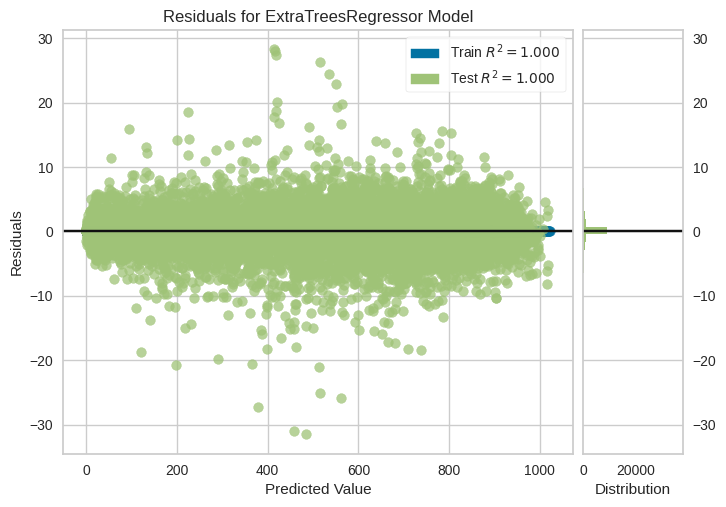

In [51]:
plot_model(et)

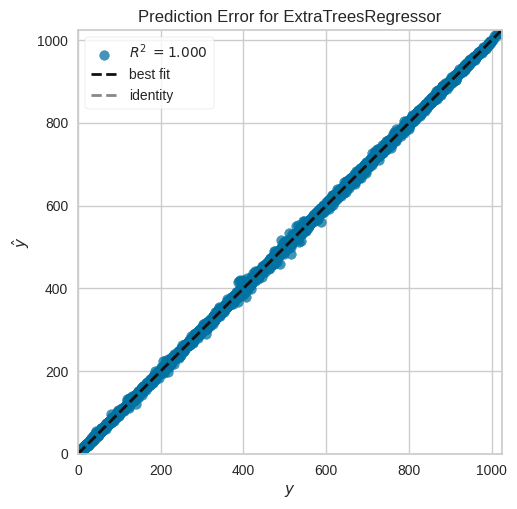

In [52]:
plot_model(et, plot = 'error')

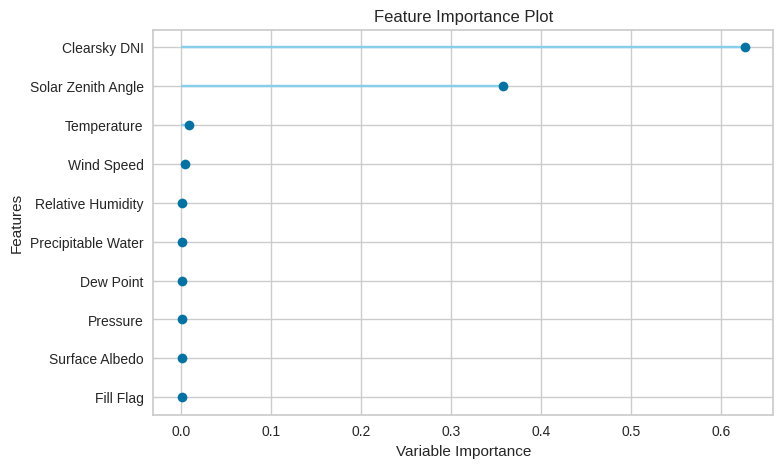

In [53]:
plot_model(et, plot='feature')